# Different Models
### Taken from https://github.com/dineshdaultani/StockPredictions

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
#nltk.download('vader_lexicon')

In [4]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('C:/Users/Owner/Documents/NewsSentimentAnalysis_StockPredictions/data_raw/pickled_twenty_year_filtered_lead_para.pkl')

In [5]:
df_stocks

,close,adj close,articles
2009-01-05,8952.889648,2.337600e+08,. Laura Bush Signs Deal for Memoir. Fringe Fes...
2009-01-06,9015.099609,2.154100e+08,. Barenboim Cancels Middle East Concerts. Ente...
2009-01-07,8769.700195,2.667100e+08,. Disputed Memoir May Be Published as Fiction....
2009-01-08,8742.459961,2.266200e+08,. Self-Publishing Company Acquires Rival. Ever...
2009-01-09,8599.179688,2.043000e+08,". Zantzinger, Who Inspired Bob Dylan Ballad, D..."
...,...,...,...
2019-12-26,28621.390625,1.559700e+08,. He is Trying to Get Fire Victims Paid. He Ha...
2019-12-27,28645.259766,1.822800e+08,". In the U.S., an Angioplasty Costs $32,000. E..."
2019-12-28,28584.220052,1.820533e+08,. When Baseball Made a Cameo at the Berlin Oly...
2019-12-29,28523.180339,1.818267e+08,". Nicole Quiterio, Matthew Wallenstein. Christ..."


In [5]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [6]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [7]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_stocks

,prices,articles
2009-01-05,233760000,Laura Bush Signs Deal for Memoir. Fringe Fest...
2009-01-06,215410000,Barenboim Cancels Middle East Concerts. Enter...
2009-01-07,266710000,Disputed Memoir May Be Published as Fiction. ...
2009-01-08,226620000,Self-Publishing Company Acquires Rival. Every...
2009-01-09,204300000,"Zantzinger, Who Inspired Bob Dylan Ballad, Di..."
...,...,...
2019-12-26,155970000,He is Trying to Get Fire Victims Paid. He Has...
2019-12-27,182280000,"In the U.S., an Angioplasty Costs $32,000. El..."
2019-12-28,182053333,When Baseball Made a Cameo at the Berlin Olym...
2019-12-29,181826666,"Nicole Quiterio, Matthew Wallenstein. Christi..."


In [9]:
df = df_stocks[['prices']].copy()
df

,prices
2009-01-05,233760000
2009-01-06,215410000
2009-01-07,266710000
2009-01-08,226620000
2009-01-09,204300000
...,...
2019-12-26,155970000
2019-12-27,182280000
2019-12-28,182053333
2019-12-29,181826666


In [10]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [11]:
df

,prices,compound,neg,neu,pos
2009-01-05,233760000,,,,
2009-01-06,215410000,,,,
2009-01-07,266710000,,,,
2009-01-08,226620000,,,,
2009-01-09,204300000,,,,
...,...,...,...,...,...
2019-12-26,155970000,,,,
2019-12-27,182280000,,,,
2019-12-28,182053333,,,,
2019-12-29,181826666,,,,


In [19]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    print(date)
    try:
        sentence = df_stocks.loc[date, 'articles']
        ss = sid.polarity_scores(sentence)
        df.at[date, 'compound']=ss['compound']
        df.at[date, 'neg']= ss['neg']
        df.at[date, 'neu']= ss['neu']
        df.at[date, 'pos']= ss['pos']
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

2009-01-05 00:00:00
2009-01-06 00:00:00
2009-01-07 00:00:00
2009-01-08 00:00:00
2009-01-09 00:00:00
2009-01-10 00:00:00
2009-01-11 00:00:00
2009-01-12 00:00:00
2009-01-13 00:00:00
2009-01-14 00:00:00
2009-01-15 00:00:00
2009-01-16 00:00:00
2009-01-17 00:00:00
2009-01-18 00:00:00
2009-01-19 00:00:00
2009-01-20 00:00:00
2009-01-21 00:00:00
2009-01-22 00:00:00
2009-01-23 00:00:00
2009-01-24 00:00:00
2009-01-25 00:00:00
2009-01-26 00:00:00
2009-01-27 00:00:00
2009-01-28 00:00:00
2009-01-29 00:00:00
2009-01-30 00:00:00
2009-01-31 00:00:00
2009-02-01 00:00:00
2009-02-02 00:00:00
2009-02-03 00:00:00
2009-02-04 00:00:00
2009-02-05 00:00:00
2009-02-06 00:00:00
2009-02-07 00:00:00
2009-02-08 00:00:00
2009-02-09 00:00:00
2009-02-10 00:00:00
2009-02-11 00:00:00
2009-02-12 00:00:00
2009-02-13 00:00:00
2009-02-14 00:00:00
2009-02-15 00:00:00
2009-02-16 00:00:00
2009-02-17 00:00:00
2009-02-18 00:00:00
2009-02-19 00:00:00
2009-02-20 00:00:00
2009-02-21 00:00:00
2009-02-22 00:00:00
2009-02-23 00:00:00


2010-02-19 00:00:00
2010-02-20 00:00:00
2010-02-21 00:00:00
2010-02-22 00:00:00
2010-02-23 00:00:00
2010-02-24 00:00:00
2010-02-25 00:00:00
2010-02-26 00:00:00
2010-02-27 00:00:00
2010-02-28 00:00:00
2010-03-01 00:00:00
2010-03-02 00:00:00
2010-03-03 00:00:00
2010-03-04 00:00:00
2010-03-05 00:00:00
2010-03-06 00:00:00
2010-03-07 00:00:00
2010-03-08 00:00:00
2010-03-09 00:00:00
2010-03-10 00:00:00
2010-03-11 00:00:00
2010-03-12 00:00:00
2010-03-13 00:00:00
2010-03-14 00:00:00
2010-03-15 00:00:00
2010-03-16 00:00:00
2010-03-17 00:00:00
2010-03-18 00:00:00
2010-03-19 00:00:00
2010-03-20 00:00:00
2010-03-21 00:00:00
2010-03-22 00:00:00
2010-03-23 00:00:00
2010-03-24 00:00:00
2010-03-25 00:00:00
2010-03-26 00:00:00
2010-03-27 00:00:00
2010-03-28 00:00:00
2010-03-29 00:00:00
2010-03-30 00:00:00
2010-03-31 00:00:00
2010-04-01 00:00:00
2010-04-02 00:00:00
2010-04-03 00:00:00
2010-04-04 00:00:00
2010-04-05 00:00:00
2010-04-06 00:00:00
2010-04-07 00:00:00
2010-04-08 00:00:00
2010-04-09 00:00:00


2011-04-06 00:00:00
2011-04-07 00:00:00
2011-04-08 00:00:00
2011-04-09 00:00:00
2011-04-10 00:00:00
2011-04-11 00:00:00
2011-04-12 00:00:00
2011-04-13 00:00:00
2011-04-14 00:00:00
2011-04-15 00:00:00
2011-04-16 00:00:00
2011-04-17 00:00:00
2011-04-18 00:00:00
2011-04-19 00:00:00
2011-04-20 00:00:00
2011-04-21 00:00:00
2011-04-22 00:00:00
2011-04-23 00:00:00
2011-04-24 00:00:00
2011-04-25 00:00:00
2011-04-26 00:00:00
2011-04-27 00:00:00
2011-04-28 00:00:00
2011-04-29 00:00:00
2011-04-30 00:00:00
2011-05-01 00:00:00
2011-05-02 00:00:00
2011-05-03 00:00:00
2011-05-04 00:00:00
2011-05-05 00:00:00
2011-05-06 00:00:00
2011-05-07 00:00:00
2011-05-08 00:00:00
2011-05-09 00:00:00
2011-05-10 00:00:00
2011-05-11 00:00:00
2011-05-12 00:00:00
2011-05-13 00:00:00
2011-05-14 00:00:00
2011-05-15 00:00:00
2011-05-16 00:00:00
2011-05-17 00:00:00
2011-05-18 00:00:00
2011-05-19 00:00:00
2011-05-20 00:00:00
2011-05-21 00:00:00
2011-05-22 00:00:00
2011-05-23 00:00:00
2011-05-24 00:00:00
2011-05-25 00:00:00


2012-05-20 00:00:00
2012-05-21 00:00:00
2012-05-22 00:00:00
2012-05-23 00:00:00
2012-05-24 00:00:00
2012-05-25 00:00:00
2012-05-26 00:00:00
2012-05-27 00:00:00
2012-05-28 00:00:00
2012-05-29 00:00:00
2012-05-30 00:00:00
2012-05-31 00:00:00
2012-06-01 00:00:00
2012-06-02 00:00:00
2012-06-03 00:00:00
2012-06-04 00:00:00
2012-06-05 00:00:00
2012-06-06 00:00:00
2012-06-07 00:00:00
2012-06-08 00:00:00
2012-06-09 00:00:00
2012-06-10 00:00:00
2012-06-11 00:00:00
2012-06-12 00:00:00
2012-06-13 00:00:00
2012-06-14 00:00:00
2012-06-15 00:00:00
2012-06-16 00:00:00
2012-06-17 00:00:00
2012-06-18 00:00:00
2012-06-19 00:00:00
2012-06-20 00:00:00
2012-06-21 00:00:00
2012-06-22 00:00:00
2012-06-23 00:00:00
2012-06-24 00:00:00
2012-06-25 00:00:00
2012-06-26 00:00:00
2012-06-27 00:00:00
2012-06-28 00:00:00
2012-06-29 00:00:00
2012-06-30 00:00:00
2012-07-01 00:00:00
2012-07-02 00:00:00
2012-07-03 00:00:00
2012-07-04 00:00:00
2012-07-05 00:00:00
2012-07-06 00:00:00
2012-07-07 00:00:00
2012-07-08 00:00:00


2013-07-05 00:00:00
2013-07-06 00:00:00
2013-07-07 00:00:00
2013-07-08 00:00:00
2013-07-09 00:00:00
2013-07-10 00:00:00
2013-07-11 00:00:00
2013-07-12 00:00:00
2013-07-13 00:00:00
2013-07-14 00:00:00
2013-07-15 00:00:00
2013-07-16 00:00:00
2013-07-17 00:00:00
2013-07-18 00:00:00
2013-07-19 00:00:00
2013-07-20 00:00:00
2013-07-21 00:00:00
2013-07-22 00:00:00
2013-07-23 00:00:00
2013-07-24 00:00:00
2013-07-25 00:00:00
2013-07-26 00:00:00
2013-07-27 00:00:00
2013-07-28 00:00:00
2013-07-29 00:00:00
2013-07-30 00:00:00
2013-07-31 00:00:00
2013-08-01 00:00:00
2013-08-02 00:00:00
2013-08-03 00:00:00
2013-08-04 00:00:00
2013-08-05 00:00:00
2013-08-06 00:00:00
2013-08-07 00:00:00
2013-08-08 00:00:00
2013-08-09 00:00:00
2013-08-10 00:00:00
2013-08-11 00:00:00
2013-08-12 00:00:00
2013-08-13 00:00:00
2013-08-14 00:00:00
2013-08-15 00:00:00
2013-08-16 00:00:00
2013-08-17 00:00:00
2013-08-18 00:00:00
2013-08-19 00:00:00
2013-08-20 00:00:00
2013-08-21 00:00:00
2013-08-22 00:00:00
2013-08-23 00:00:00


2014-08-24 00:00:00
2014-08-25 00:00:00
2014-08-26 00:00:00
2014-08-27 00:00:00
2014-08-28 00:00:00
2014-08-29 00:00:00
2014-08-30 00:00:00
2014-08-31 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00
2014-09-06 00:00:00
2014-09-07 00:00:00
2014-09-08 00:00:00
2014-09-09 00:00:00
2014-09-10 00:00:00
2014-09-11 00:00:00
2014-09-12 00:00:00
2014-09-13 00:00:00
2014-09-14 00:00:00
2014-09-15 00:00:00
2014-09-16 00:00:00
2014-09-17 00:00:00
2014-09-18 00:00:00
2014-09-19 00:00:00
2014-09-20 00:00:00
2014-09-21 00:00:00
2014-09-22 00:00:00
2014-09-23 00:00:00
2014-09-24 00:00:00
2014-09-25 00:00:00
2014-09-26 00:00:00
2014-09-27 00:00:00
2014-09-28 00:00:00
2014-09-29 00:00:00
2014-09-30 00:00:00
2014-10-01 00:00:00
2014-10-02 00:00:00
2014-10-03 00:00:00
2014-10-04 00:00:00
2014-10-05 00:00:00
2014-10-06 00:00:00
2014-10-07 00:00:00
2014-10-08 00:00:00
2014-10-09 00:00:00
2014-10-10 00:00:00
2014-10-11 00:00:00
2014-10-12 00:00:00


2015-10-08 00:00:00
2015-10-09 00:00:00
2015-10-10 00:00:00
2015-10-11 00:00:00
2015-10-12 00:00:00
2015-10-13 00:00:00
2015-10-14 00:00:00
2015-10-15 00:00:00
2015-10-16 00:00:00
2015-10-17 00:00:00
2015-10-18 00:00:00
2015-10-19 00:00:00
2015-10-20 00:00:00
2015-10-21 00:00:00
2015-10-22 00:00:00
2015-10-23 00:00:00
2015-10-24 00:00:00
2015-10-25 00:00:00
2015-10-26 00:00:00
2015-10-27 00:00:00
2015-10-28 00:00:00
2015-10-29 00:00:00
2015-10-30 00:00:00
2015-10-31 00:00:00
2015-11-01 00:00:00
2015-11-02 00:00:00
2015-11-03 00:00:00
2015-11-04 00:00:00
2015-11-05 00:00:00
2015-11-06 00:00:00
2015-11-07 00:00:00
2015-11-08 00:00:00
2015-11-09 00:00:00
2015-11-10 00:00:00
2015-11-11 00:00:00
2015-11-12 00:00:00
2015-11-13 00:00:00
2015-11-14 00:00:00
2015-11-15 00:00:00
2015-11-16 00:00:00
2015-11-17 00:00:00
2015-11-18 00:00:00
2015-11-19 00:00:00
2015-11-20 00:00:00
2015-11-21 00:00:00
2015-11-22 00:00:00
2015-11-23 00:00:00
2015-11-24 00:00:00
2015-11-25 00:00:00
2015-11-26 00:00:00


2016-11-27 00:00:00
2016-11-28 00:00:00
2016-11-29 00:00:00
2016-11-30 00:00:00
2016-12-01 00:00:00
2016-12-02 00:00:00
2016-12-03 00:00:00
2016-12-04 00:00:00
2016-12-05 00:00:00
2016-12-06 00:00:00
2016-12-07 00:00:00
2016-12-08 00:00:00
2016-12-09 00:00:00
2016-12-10 00:00:00
2016-12-11 00:00:00
2016-12-12 00:00:00
2016-12-13 00:00:00
2016-12-14 00:00:00
2016-12-15 00:00:00
2016-12-16 00:00:00
2016-12-17 00:00:00
2016-12-18 00:00:00
2016-12-19 00:00:00
2016-12-20 00:00:00
2016-12-21 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2016-12-24 00:00:00
2016-12-25 00:00:00
2016-12-26 00:00:00
2016-12-27 00:00:00
2016-12-28 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2016-12-31 00:00:00
2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-14 00:00:00
2017-01-15 00:00:00


2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00
2018-02-20 00:00:00
2018-02-21 00:00:00
2018-02-22 00:00:00
2018-02-23 00:00:00
2018-02-24 00:00:00
2018-02-25 00:00:00
2018-02-26 00:00:00
2018-02-27 00:00:00
2018-02-28 00:00:00
2018-03-01 00:00:00
2018-03-02 00:00:00
2018-03-03 00:00:00
2018-03-04 00:00:00
2018-03-05 00:00:00
2018-03-06 00:00:00


2019-03-06 00:00:00
2019-03-07 00:00:00
2019-03-08 00:00:00
2019-03-09 00:00:00
2019-03-10 00:00:00
2019-03-11 00:00:00
2019-03-12 00:00:00
2019-03-13 00:00:00
2019-03-14 00:00:00
2019-03-15 00:00:00
2019-03-16 00:00:00
2019-03-17 00:00:00
2019-03-18 00:00:00
2019-03-19 00:00:00
2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-23 00:00:00
2019-03-24 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-03-30 00:00:00
2019-03-31 00:00:00
2019-04-01 00:00:00
2019-04-02 00:00:00
2019-04-03 00:00:00
2019-04-04 00:00:00
2019-04-05 00:00:00
2019-04-06 00:00:00
2019-04-07 00:00:00
2019-04-08 00:00:00
2019-04-09 00:00:00
2019-04-10 00:00:00
2019-04-11 00:00:00
2019-04-12 00:00:00
2019-04-13 00:00:00
2019-04-14 00:00:00
2019-04-15 00:00:00
2019-04-16 00:00:00
2019-04-17 00:00:00
2019-04-18 00:00:00
2019-04-19 00:00:00
2019-04-20 00:00:00
2019-04-21 00:00:00
2019-04-22 00:00:00
2019-04-23 00:00:00
2019-04-24 00:00:00


In [21]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(sentence)
ss

{'neg': 0.134, 'neu': 0.79, 'pos': 0.076, 'compound': -0.9968}

In [22]:
df

,prices,compound,neg,neu,pos
2009-01-05,233760000,-0.9947,0.117,0.784,0.099
2009-01-06,215410000,0.9983,0.098,0.775,0.127
2009-01-07,266710000,-0.9978,0.127,0.766,0.107
2009-01-08,226620000,-0.9964,0.094,0.836,0.071
2009-01-09,204300000,-0.9994,0.132,0.788,0.08
...,...,...,...,...,...
2019-12-26,155970000,0.9255,0.077,0.833,0.09
2019-12-27,182280000,-0.8516,0.132,0.746,0.122
2019-12-28,182053333,-0.9922,0.155,0.774,0.071
2019-12-29,181826666,-0.959,0.087,0.828,0.085


In [143]:
train_start_date = '2009-01-01'
train_end_date = '2016-12-31'
test_start_date = '2017-01-01'
test_end_date = '2019-12-30'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [144]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [145]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [146]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [186]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ValueError: Number of labels=2918 does not match number of samples=304

In [148]:
print (rf.feature_importances_)

[0.52813501 0.47186499]


In [149]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [150]:
prediction

array([[1.26794900e+08],
       [1.09328483e+08],
       [2.66611217e+08],
       ...,
       [1.55367507e+08],
       [1.36038233e+08],
       [1.77400662e+08]])

In [151]:

contributions

array([[-29621030.40218699,   1026531.24270447],
       [-21081272.66271566, -24979643.12676686],
       [ 64180779.47883751,  47041038.13167997],
       ...,
       [ -2324564.54925119,   2302672.60043533],
       [-20582120.7082215 ,   1230955.01207232],
       [ 42446191.26309753, -20434928.70258004]])

In [152]:

import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [154]:

predictions_df

,prices
2017-01-01,1.267949e+08
2017-01-02,1.093285e+08
2017-01-03,2.666112e+08
2017-01-04,1.595112e+08
2017-01-05,1.403361e+08
...,...
2019-12-26,1.257943e+08
2019-12-27,1.667228e+08
2019-12-28,1.553675e+08
2019-12-29,1.360382e+08


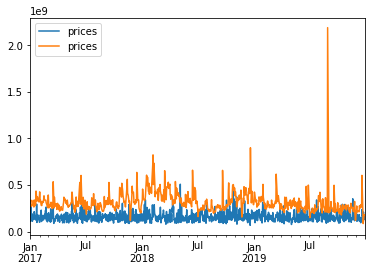

In [155]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

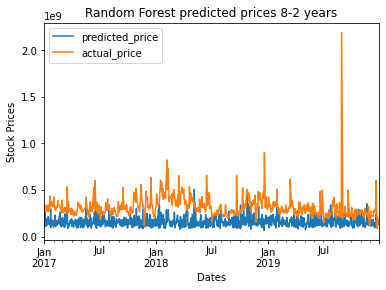

In [156]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

## Increasing the prices by a constant value so that it represents closing price during the testing

In [157]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

294684750.0
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11
158564098.20995715
136120651.79004285


In [158]:
predictions_df

,prices
2017-01-01,1.267949e+08
2017-01-02,1.093285e+08
2017-01-03,2.666112e+08
2017-01-04,1.595112e+08
2017-01-05,1.403361e+08
...,...
2019-12-26,1.257943e+08
2019-12-27,1.667228e+08
2019-12-28,1.553675e+08
2019-12-29,1.360382e+08


In [159]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2017-01-01,2.629156e+08
2017-01-02,2.454491e+08
2017-01-03,4.027319e+08
2017-01-04,2.956319e+08
2017-01-05,2.764568e+08
...,...
2019-12-26,2.619149e+08
2019-12-27,3.028434e+08
2019-12-28,2.914882e+08
2019-12-29,2.721589e+08


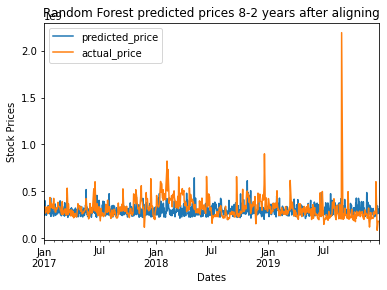

In [160]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest with aligning.png")

## Smoothing the time series data
## Applying EWMA pandas to smooth the stock prices

In [161]:
predictions_df

,prices
2017-01-01,2.629156e+08
2017-01-02,2.454491e+08
2017-01-03,4.027319e+08
2017-01-04,2.956319e+08
2017-01-05,2.764568e+08
...,...
2019-12-26,2.619149e+08
2019-12-27,3.028434e+08
2019-12-28,2.914882e+08
2019-12-29,2.721589e+08


In [162]:
predictions_df['ewma'] = predictions_df["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()

In [163]:
predictions_df

,prices,ewma
2017-01-01,2.629156e+08,2.629156e+08
2017-01-02,2.454491e+08,2.540368e+08
2017-01-03,4.027319e+08,3.052630e+08
2017-01-04,2.956319e+08,3.027335e+08
2017-01-05,2.764568e+08,2.971221e+08
...,...,...
2019-12-26,2.619149e+08,2.955614e+08
2019-12-27,3.028434e+08,2.958001e+08
2019-12-28,2.914882e+08,2.956588e+08
2019-12-29,2.721589e+08,2.948883e+08


In [164]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()

In [165]:

predictions_df

,prices,ewma,actual_value,actual_value_ewma
2017-01-01,2.629156e+08,2.629156e+08,305545000,3.055450e+08
2017-01-02,2.454491e+08,2.540368e+08,322362500,3.140939e+08
2017-01-03,4.027319e+08,3.052630e+08,339180000,3.227362e+08
2017-01-04,2.956319e+08,3.027335e+08,280010000,3.115147e+08
2017-01-05,2.764568e+08,2.971221e+08,269920000,3.026321e+08
...,...,...,...,...
2019-12-26,2.619149e+08,2.955614e+08,155970000,2.544744e+08
2019-12-27,3.028434e+08,2.958001e+08,182280000,2.521074e+08
2019-12-28,2.914882e+08,2.956588e+08,182053333,2.498106e+08
2019-12-29,2.721589e+08,2.948883e+08,181826666,2.475816e+08


In [166]:
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

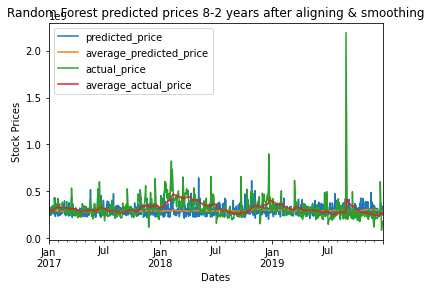

In [167]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing.png")

In [168]:
 
predictions_df.to_csv('C:/Users/Owner/Desktop/put on drive/text mining/data_raw/sample_interpolated_df_10_years_filtered_lead_para22.csv',
                       sep=',', encoding='utf-8')

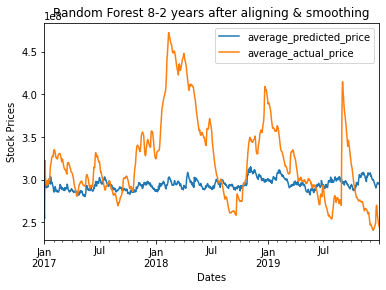

In [169]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing 2.png")

## Increasing the prices by a constant value so that it represents closing price during the testing

In [170]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

## LogisticRegression

C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


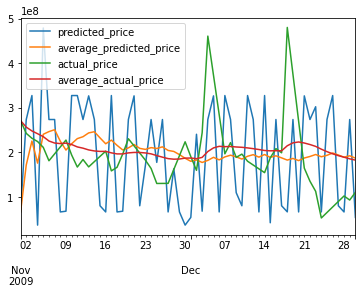

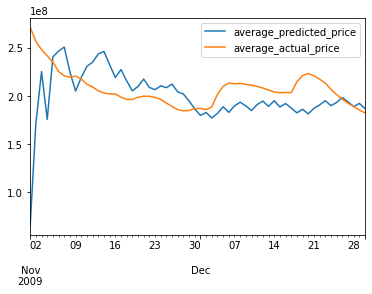

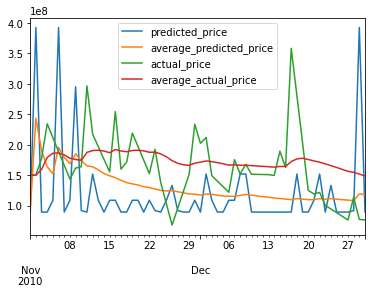

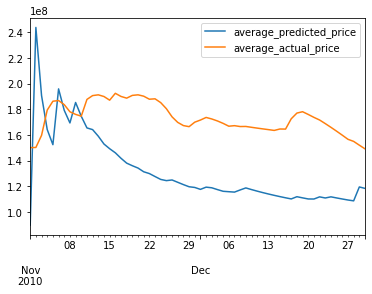

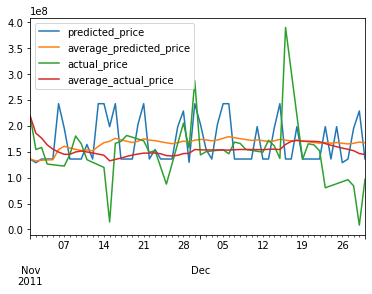

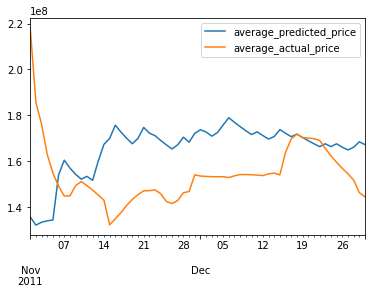

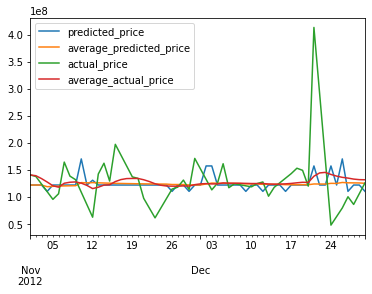

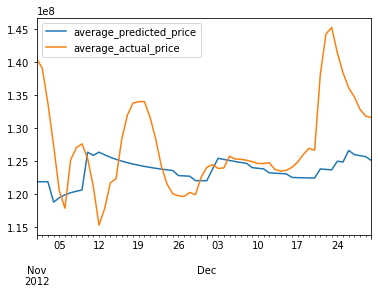

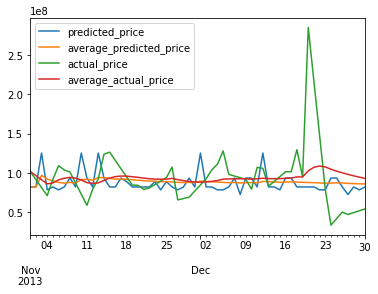

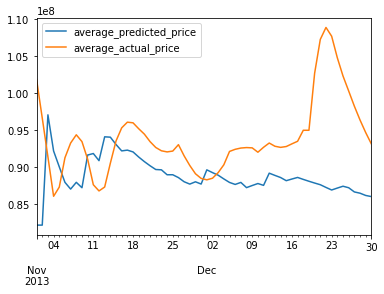

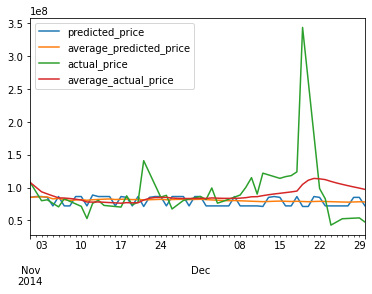

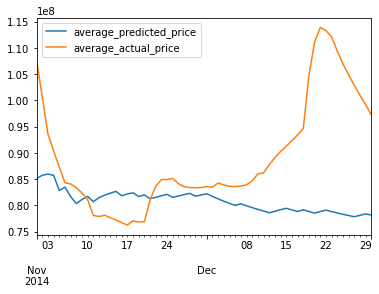

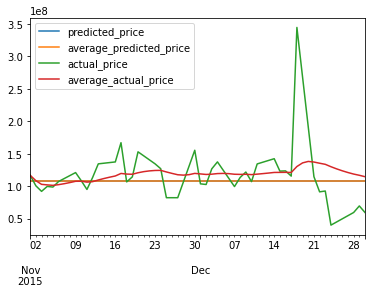

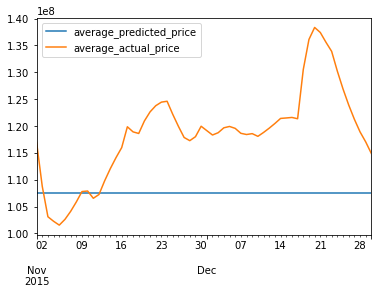

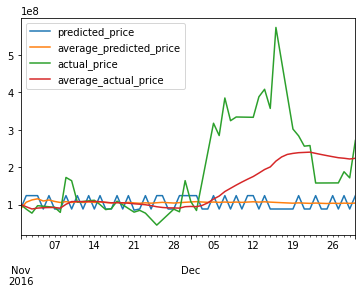

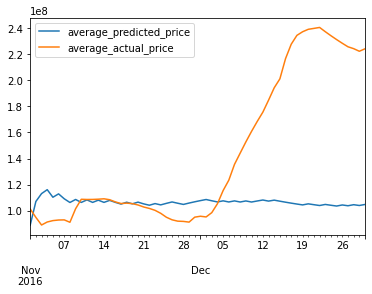

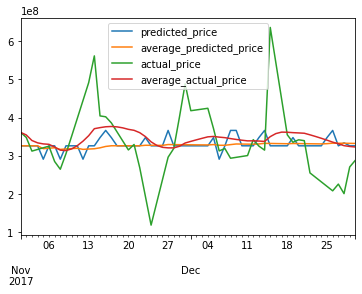

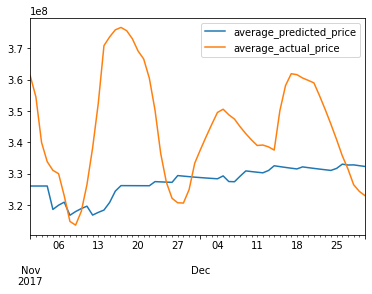

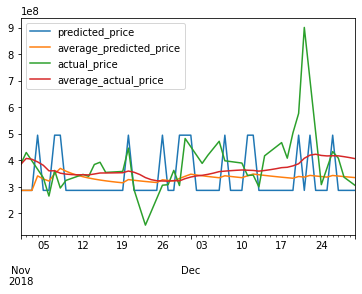

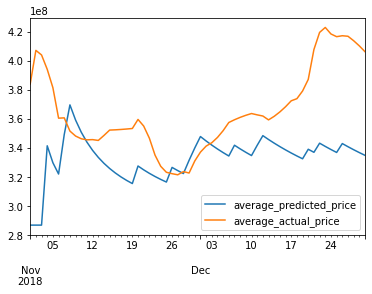

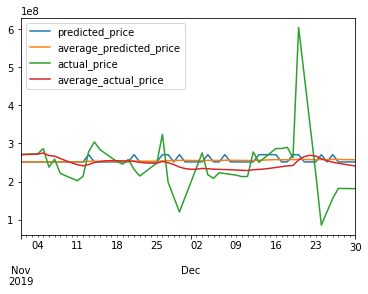

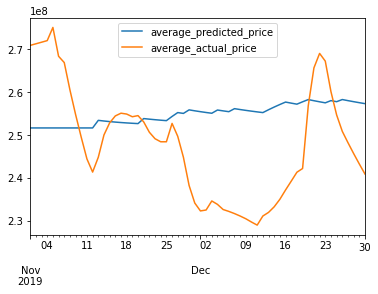

In [172]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()

In [173]:
lr.classes_

array([ 149840000,  171005000,  178620000,  190060000,  192170000,
        193930000,  195200000,  199390000,  199500000,  199543333,
        199730000,  201370000,  202340000,  202710000,  203130000,
        203903333,  204240000,  205180000,  206916666,  207070000,
        207990000,  208020000,  208650000,  208790000,  209700000,
        211680000,  212360000,  212606666,  212860000,  213013333,
        213106666,  213400000,  214290000,  214660000,  215240000,
        215950000,  216070000,  216310000,  217680000,  217780000,
        218330000,  219270000,  219413333,  220620000,  221046666,
        221310000,  222540000,  222680000,  222780000,  222810000,
        223210000,  223580000,  223690000,  226000000,  226636666,
        229180000,  229380000,  229436666,  229493333,  229550000,
        230840000,  231750000,  232166666,  232170000,  232390000,
        232570000,  233040000,  233650000,  237170000,  237220000,
        238100000,  239383333,  240103333,  240260000,  240772

In [174]:

lr.coef_[0]

array([-0.16471085, -0.02801965,  0.04453959, -0.01753804])

## RandomForestRegressor

C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


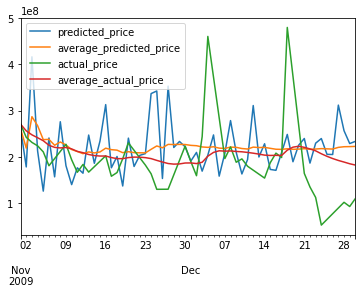

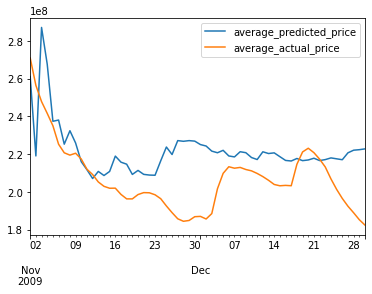

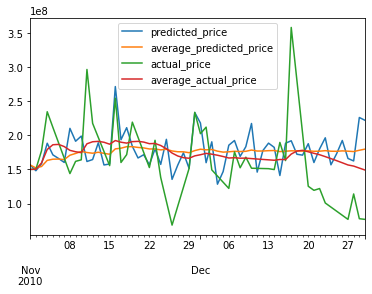

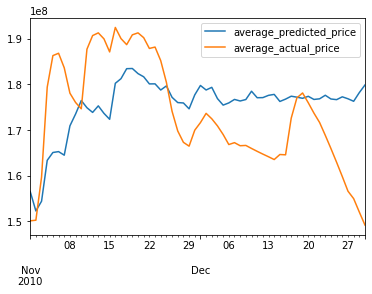

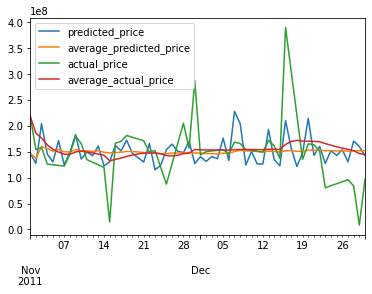

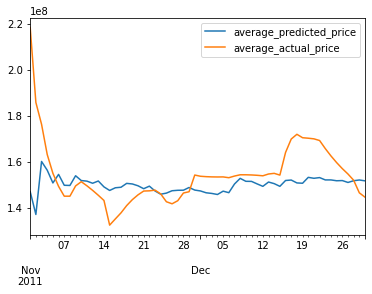

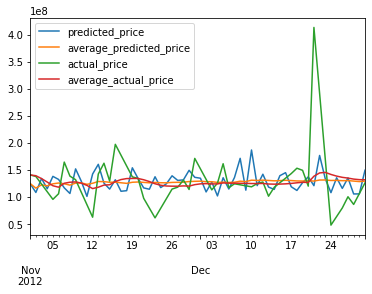

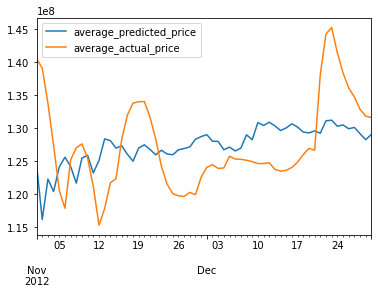

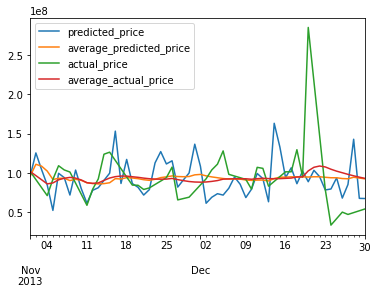

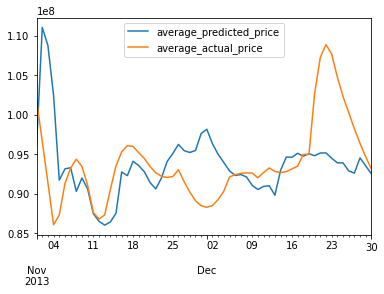

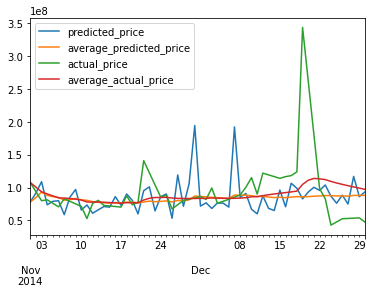

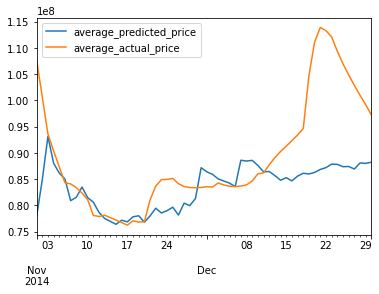

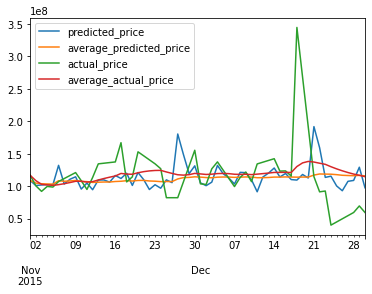

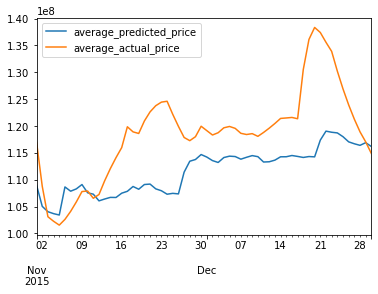

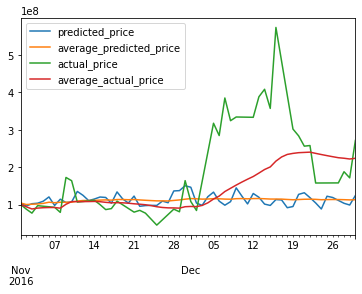

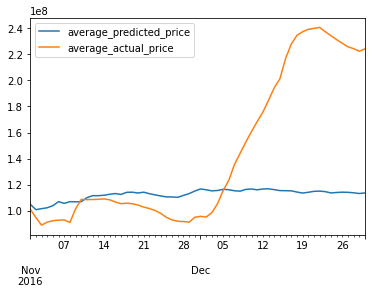

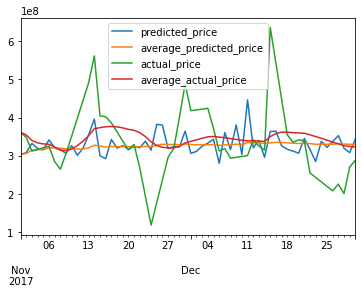

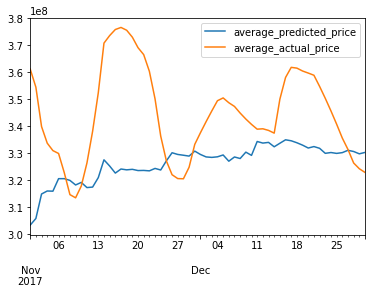

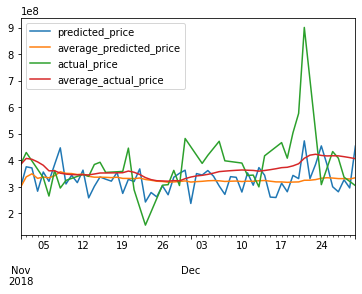

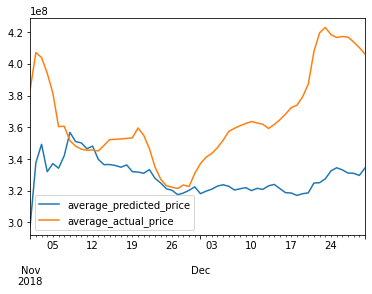

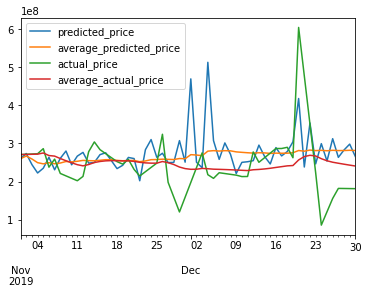

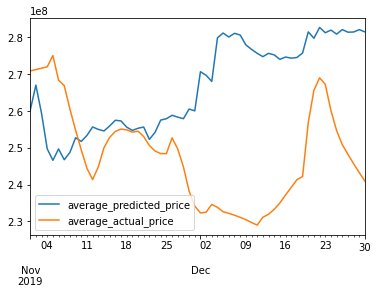

In [182]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=7)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()

### MLP Classifier

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

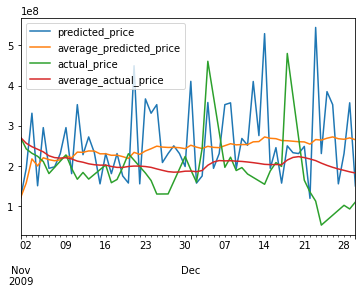

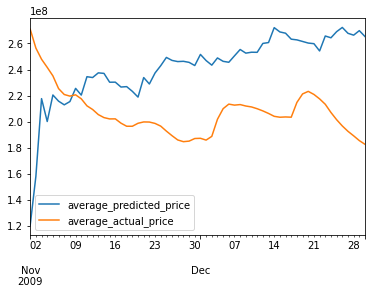

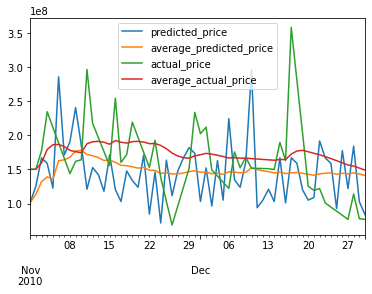

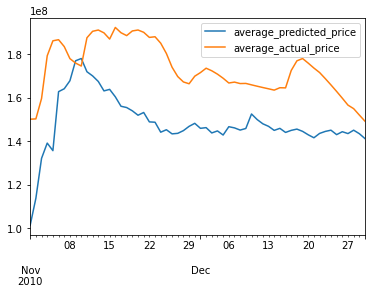

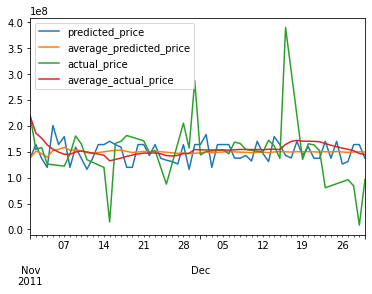

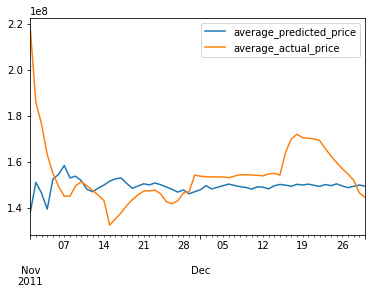

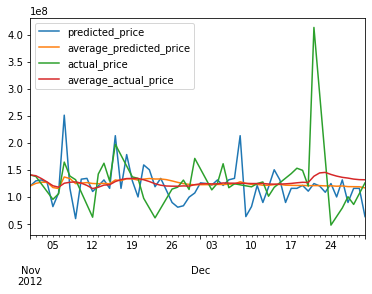

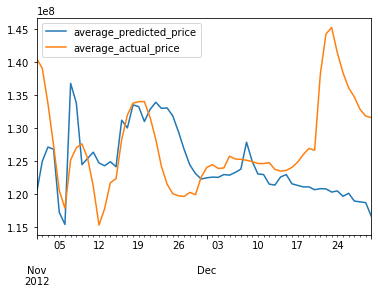

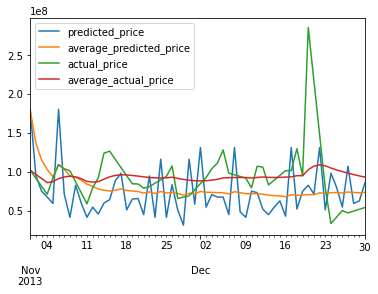

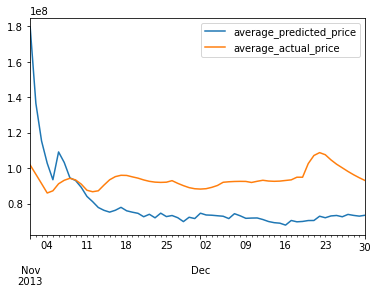

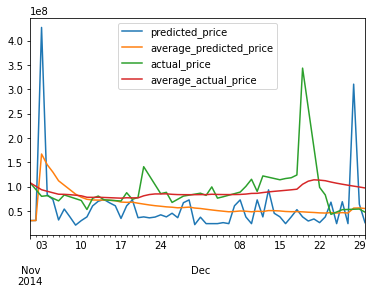

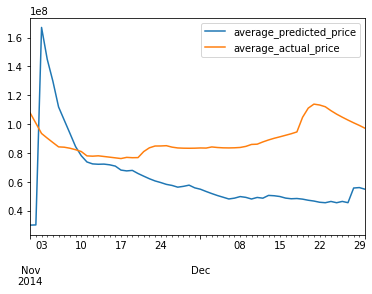

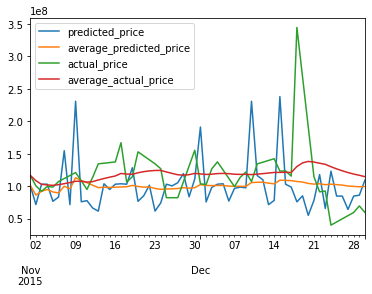

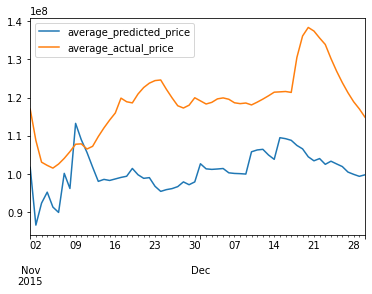

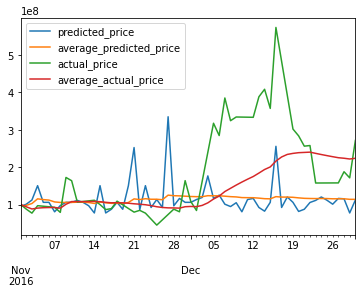

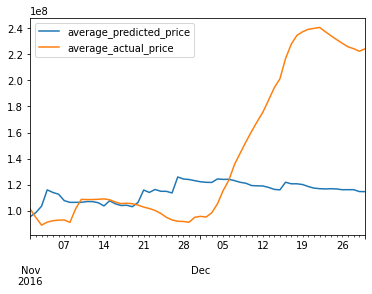

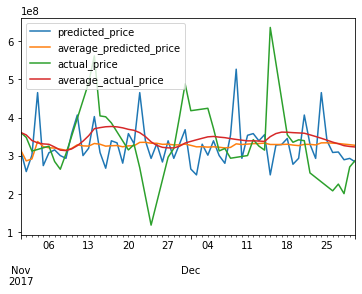

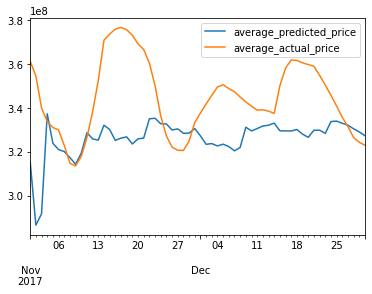

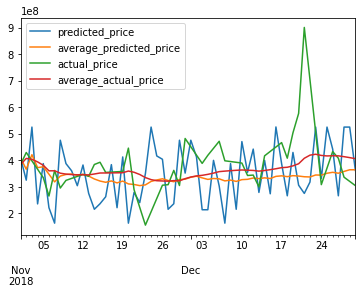

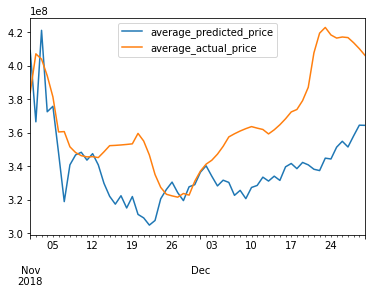

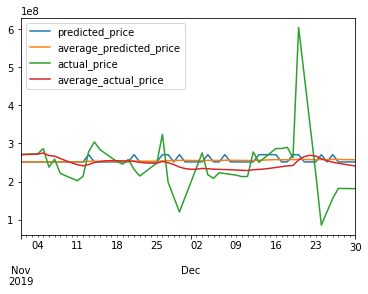

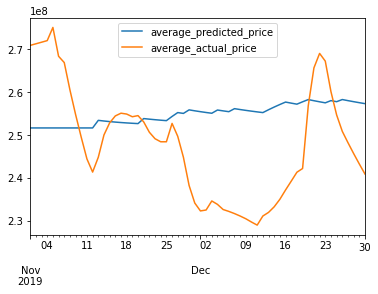

In [191]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()

In [195]:

# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

IndexError: invalid index to scalar variable.